# Predicting Heart Disease Using Machine Learning

                                          APPROACH:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease? 

## 2. Data

> The original data came from the Cleavland dataset from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursuit the project.

## 4. Features

> **Create data dictionary**

## 5. Preparing Tools for Modelling

In [1]:
# Import all the tools we'll need
# Regular EDA (expository data analysis) and Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# For Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load Data

In [3]:
df = pd.read_csv('C:/Users/MUSAWENKOSI NYAWO/Downloads/ML DATASCIENCE/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Data Exploration
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

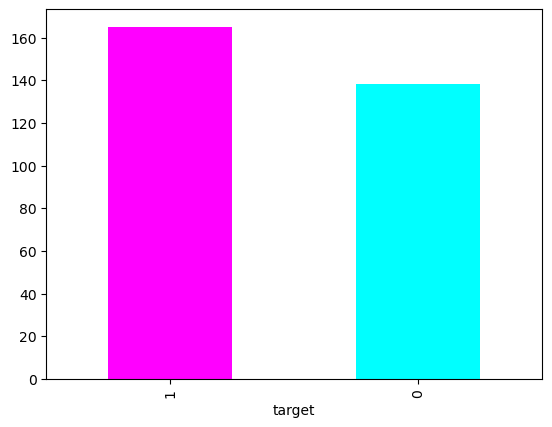

In [ ]:
df['target'].value_counts().plot(kind='bar', color=['magenta','cyan']);

In [ ]:
# Checking for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Checking our Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Versus Sex

In [ ]:
# In my work MALE = 1, FEMALE = 0
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


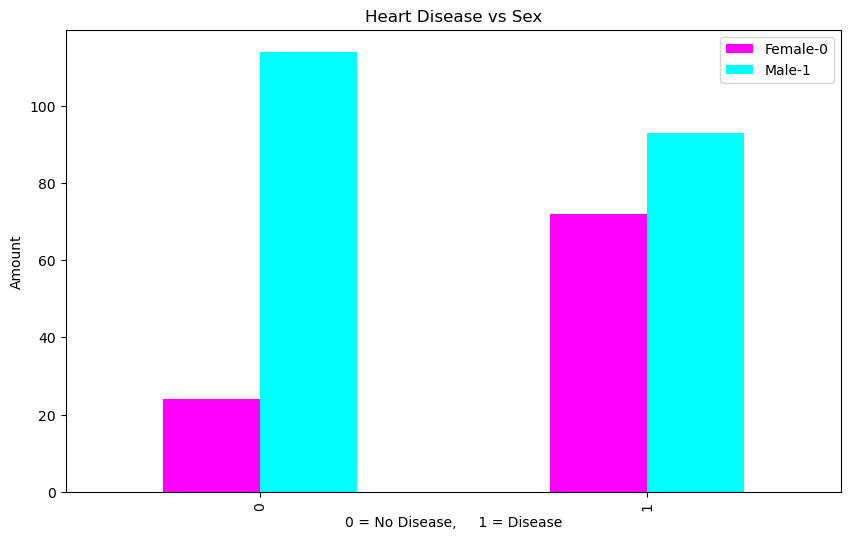

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                    color=('magenta', 'cyan'))
plt.title('Heart Disease vs Sex')
plt.xlabel('0 = No Disease,     1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female-0','Male-1'])

## Age vs. Max Heart Rate for Heart Disease

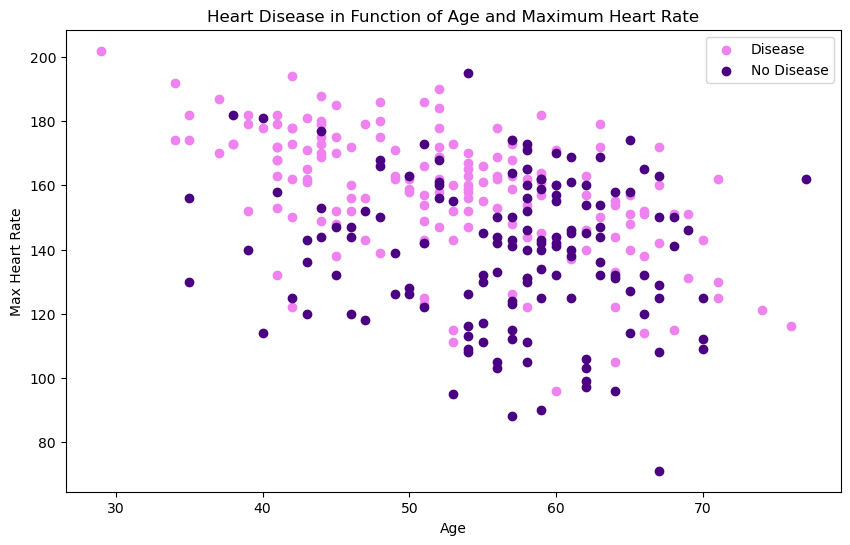

In [ ]:
# Creating another fig.
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='violet')
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='indigo');
plt.title('Heart Disease in Function of Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

Text(0, 0.5, 'Max Heart Rate')

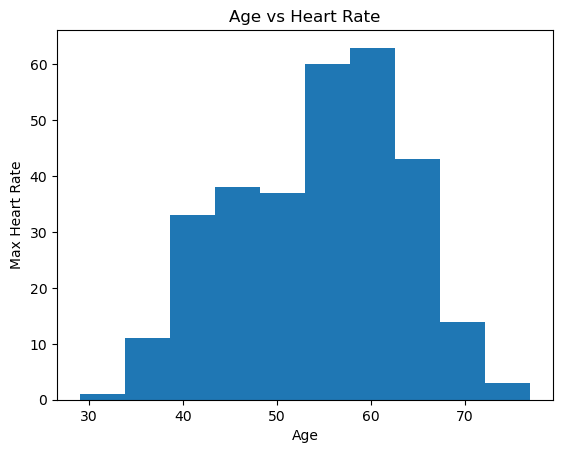

In [ ]:
# Check the Age Distribution ~ we use a Histogram
df.age.plot.hist();
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')


## Heart Disease frequency per Chest Pain Type

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


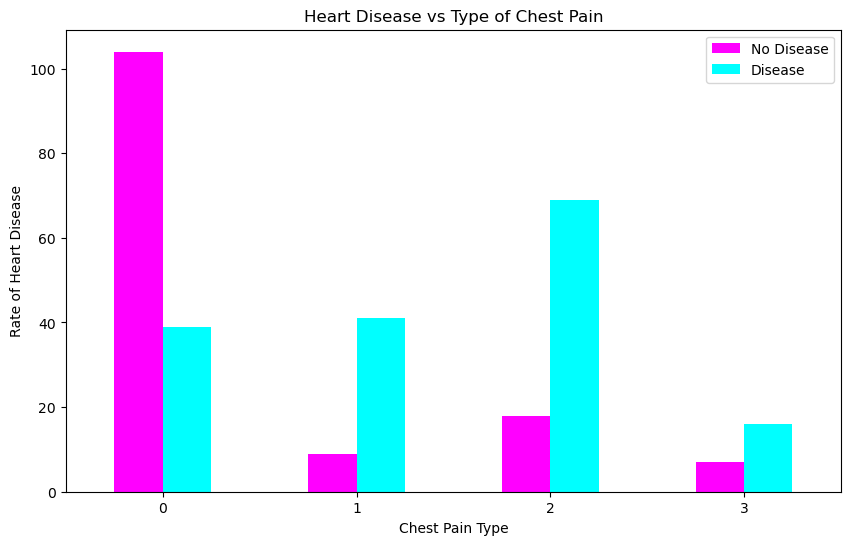

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,6),
                                   color=['magenta', 'cyan'])
plt.title('Heart Disease vs Type of Chest Pain')
plt.xlabel('Chest Pain Type')
plt.ylabel('Rate of Heart Disease')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0);


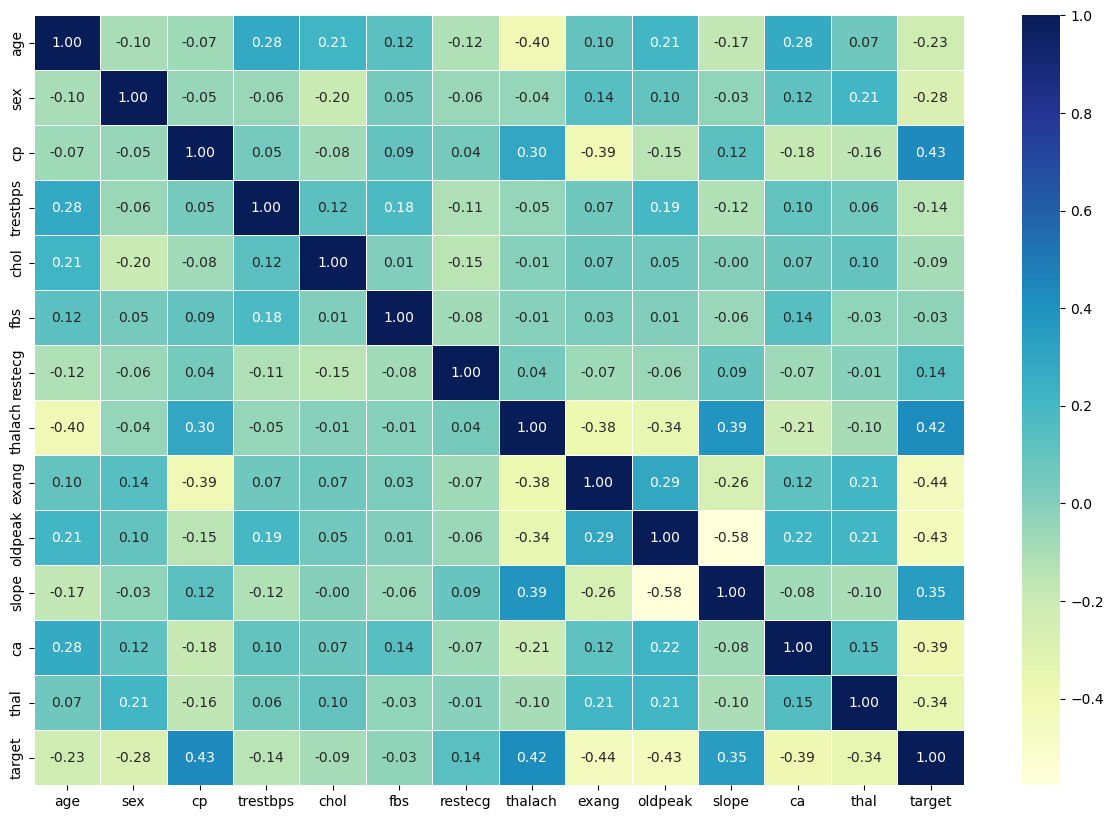

In [ ]:
# Correlation Matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=.5,
                 fmt='.2f',
                 cmap='YlGnBu');

# 5. Modelling

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Split Data into train_data and test_data
x = df.drop('target', axis=1)
y = df['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# Split data into train and test set 
np.random.seed(42)

#Split intp train set and test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2)

In [ ]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [ ]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

# Build a Machine Learning Training Model


In [ ]:
# I will try three training models in training
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score
def fit_and_score(models, x_train, x_test,y_train, y_test):
    '''
    x_train: training data(no labels)
    x_test: testing data(no labels)
    y_train: training labels
    y_test: testing labels
    '''
    #set  random seed
    np.random.seed(42)
    # make an empty dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores    


In [ ]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

c:\Users\MUSAWENKOSI NYAWO\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Model Comparison

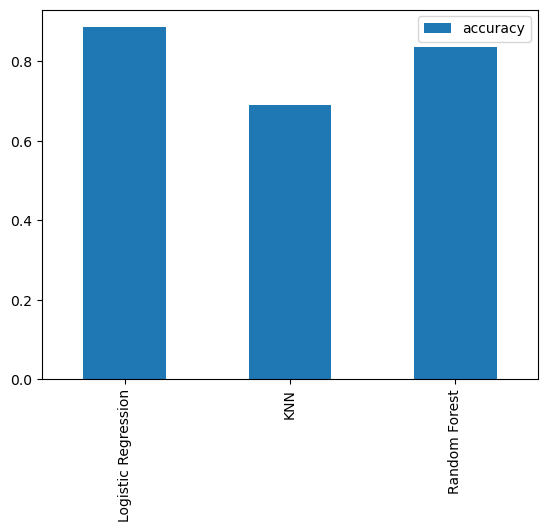

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

# Hyperparameter Tuning & Cross-Validation


In [ ]:
# Tuning KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Set KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
def new_func(train_scores, knn):
    train_scores.append(knn.score(x_train, y_train))

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the Algorithm
    knn.fit(x_train, y_train)

    # Update the training scores
    new_func(train_scores, knn)

    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))
    


In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [ ]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


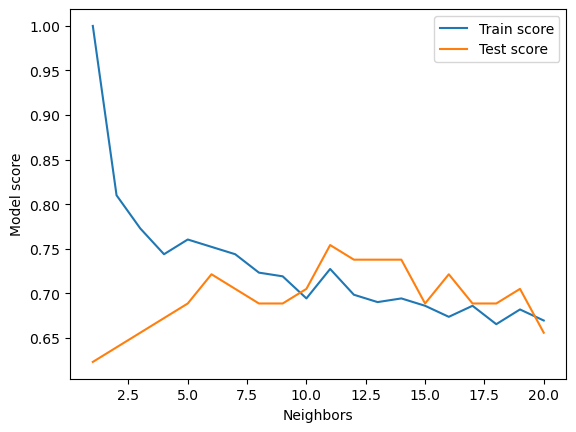

In [ ]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xlabel('Neighbors')
plt.ylabel('Model score')
plt.legend()
print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

# Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
# Create Hyperparameter for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20), 
                'solver': ['liblinear']}
log_reg_grid

{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
        4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
        2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
        1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
        5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
 'solver': ['liblinear']}

In [ ]:
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3, 5, 10,],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [ ]:
# Tune logistic regression
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(x_train, y_train)                            

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [ ]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [ ]:
# Tuning Random Forest Classifier
np.random.seed(42)

# Setup random hyperparameter
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
rs_rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
# Find best parameters
rs_rf.best_params_

{'n_estimators': np.int64(360),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(15),
 'max_depth': 5}

In [ ]:
# Evaluate RandomForestClassifier Model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

# Tuning LogisticRegression model using GridSearchCV, since it performed better than KNN and Random Forest Classifier models

In [ ]:
# Create Hyperparameter for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 30), 
                'solver': ['liblinear']}

# Setting up Parameter for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)


In [ ]:
# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Check best parameters
gs_log_reg.best_params_

{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [ ]:
# Evaluate
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [ ]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [ ]:
# Evaluating tuned model
y_preds = gs_log_reg.predict(x_test)

In [ ]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

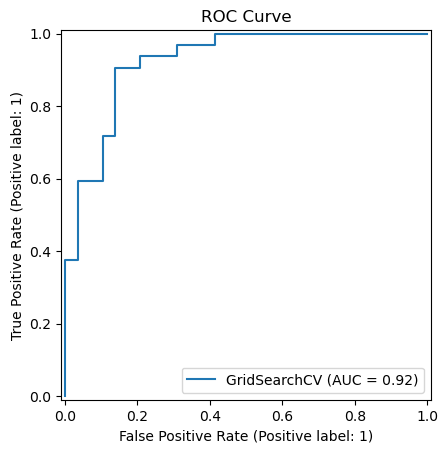

In [ ]:
# plot ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.title('ROC Curve')
plt.show()

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


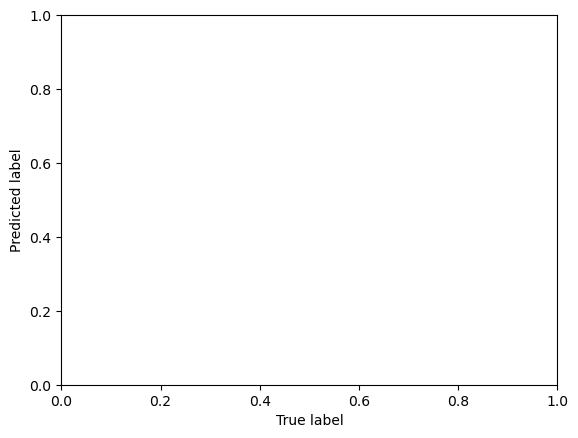

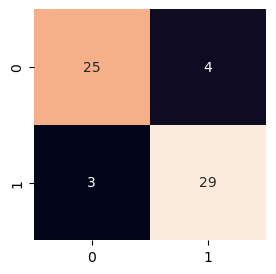

In [ ]:
# sns.set(font_size=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plot_conf_mat(y_test, y_preds)    

Classification Report

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Calculate evaluation metrics using cross-validation
gs_log_reg.best_params_


{'C': np.float64(0.20433597178569418), 'solver': 'liblinear'}

In [ ]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear',)

In [ ]:
# Cross-val accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [ ]:
np.mean(cv_acc)

np.float64(0.8446994535519124)

In [ ]:
# Cross-val precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8207936507936507)

In [ ]:
# Cross- Recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9212121212121213)

In [ ]:
# F1 Score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8673007976269721)

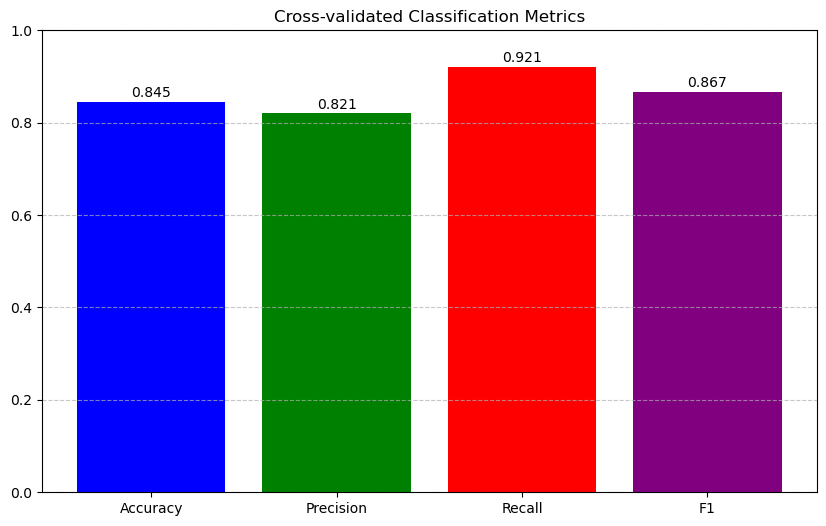

In [ ]:
# Visualize Cross-Validated Metrics
cv_metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Score': [np.mean(cv_acc), cv_precision, cv_recall, cv_f1]
})

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(cv_metrics['Metric'], cv_metrics['Score'], color=['blue', 'green', 'red', 'purple'])
plt.title('Cross-validated Classification Metrics')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(cv_metrics['Score']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')
plt.show()

# Feature Importance

In [ ]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')
clf.fit(x_train, y_train);

In [ ]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [ ]:
# Match coef_ features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0032076883508599633),
 'sex': np.float64(-0.8606204883695241),
 'cp': np.float64(0.660014324982524),
 'trestbps': np.float64(-0.01155970600550047),
 'chol': np.float64(-0.0016649614843449207),
 'fbs': np.float64(0.040172360271308105),
 'restecg': np.float64(0.31603405294617176),
 'thalach': np.float64(0.02458922341328129),
 'exang': np.float64(-0.604701713592625),
 'oldpeak': np.float64(-0.5679545646616215),
 'slope': np.float64(0.4508539209693025),
 'ca': np.float64(-0.6373332766360461),
 'thal': np.float64(-0.6755509369619848)}

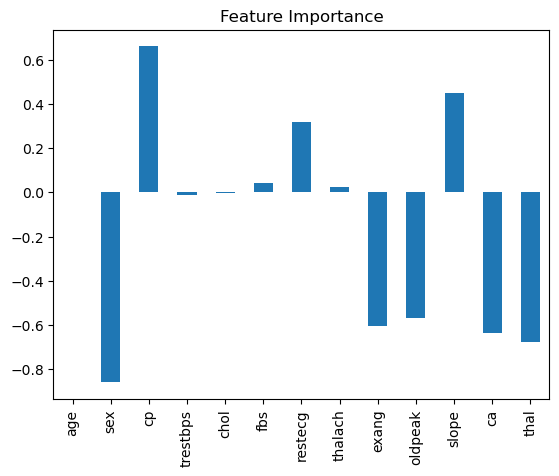

In [ ]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);